<a href="https://colab.research.google.com/github/rfajri27/a555-data-visualization/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Proyek Analisis Data: E-Commerce Public Dataset__

*  Nama                 : Lazuardi Favian Fazari
*  Email                : lazuardifazari@gmail.com
*  Username Dicoding    : zettoo

## __Menentukan Pertanyaan Bisnis__

-  Kategori produk apa yang paling banyak dan paling sedikit terjual?
-  Bagaimana tren penjualan berdasarkan waktu?
-  Bagaimana skor review mempengaruhi penjualan?
-  Dimanakah lokasi yang memiliki pelanggan terbanyak?
-  Apakah pengiriman tepat waktu dapat mempengaruhi review score produk?

## __Menyiapkan semua library yang dibutuhkan__

In [92]:
# berikut adalah semua library yang dibutuhkan untuk menjalankan Jupyter Notebook ini
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import matplotlib.image as mpimg
import urllib

## __Data Wrangling__

### Gathering Data

Pada bagian ini, data yang sudah diperoleh akan diassign ke variabel untuk selanjutnya dilakukan analisis

In [93]:
customers_data = pd.read_csv('data/customers_dataset.csv')
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [94]:
geolocation_data = pd.read_csv('data/geolocation_dataset.csv')
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [95]:
orders_items_data = pd.read_csv('data/order_items_dataset.csv')
orders_items_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [96]:
order_payments_data = pd.read_csv('data/order_payments_dataset.csv')
order_payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [97]:
order_reviews_data = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [98]:
order_data = pd.read_csv('data/orders_dataset.csv')
order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [99]:
product_category = pd.read_csv('data/product_category_name_translation.csv')
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [100]:
product_data = pd.read_csv('data/products_dataset.csv')
product_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [101]:
seller_data = pd.read_csv('data/sellers_dataset.csv')
seller_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Pada tahap ini, dilakukan identifikasi masalah pada data

#### Menilai Data

Dimulai dari mencari tahu informasi setiap data

In [102]:
customers_data.info()
geolocation_data.info()
order_data.info()
order_payments_data.info()
order_reviews_data.info()
orders_items_data.info()
product_data.info()
product_category.info()
seller_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

Dari hasil di atas dapat diketahui bahwa beberapa kolom data tipenya tidak sesuai. misalnya pada data 'order_data' di kolom 'order_purchase_timestamp' dimana seharusnya data kolom tersebut bertipe 'datetime', maka kita bisa mengganti tipe data tersebut pada tahap selanjutnya.

#### Cek missing value data

Kemudian mengecek apakah ada missing value pada data

In [103]:
print('\n info data null customer : \n', customers_data.isnull().sum())
print('\n info data null geolocation: \n', geolocation_data.isnull().sum())
print('\n info data null order : \n', order_data.isnull().sum())
print('\n info data null order payments: \n',
      order_payments_data.isnull().sum())
print('\n info data null order reviews : \n',
      order_reviews_data.isnull().sum())
print('\n info data null order items : \n', orders_items_data.isnull().sum())
print('\n info data null product data : \n', product_data.isnull().sum())
print('\n info data null product category : \n',
      product_category.isnull().sum())
print('\n info data null seller data : \n', seller_data.isnull().sum())


 info data null customer : 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 info data null geolocation: 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

 info data null order : 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

 info data null order payments: 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

 info data null order reviews : 
 review_id                      0
order_i

Hasillnya menunjukkan beberapa data terdapat missing value

#### Cek data duplikat

Cek data yang duplikat

In [104]:
print('\n info data duplicated customer : ', customers_data.duplicated().sum())
print('\n info data duplicated geolocation: ',
      geolocation_data.duplicated().sum())
print('\n info data duplicated order : ', order_data.duplicated().sum())
print('\n info data duplicated order payments: ',
      order_payments_data.duplicated().sum())
print('\n info data duplicated order reviews : ',
      order_reviews_data.duplicated().sum())
print('\n info data duplicated order items : ',
      orders_items_data.duplicated().sum())
print('\n info data duplicated product data : ',
      product_data.duplicated().sum())
print('\n info data duplicated product category : ',
      product_category.duplicated().sum())
print('\n info data duplicated seller data : ', seller_data.duplicated().sum())


 info data duplicated customer :  0

 info data duplicated geolocation:  261831

 info data duplicated order :  0

 info data duplicated order payments:  0

 info data duplicated order reviews :  0

 info data duplicated order items :  0

 info data duplicated product data :  0

 info data duplicated product category :  0

 info data duplicated seller data :  0


Hasilnya menunjukkan bahwa geolocation data mempunyai data duplikat yang banyak

#### Data describe

In [105]:
print('\n info data describe customer : \n',
      customers_data.describe(include='all'))


print('\n info data describe geolocation: \n',
      geolocation_data.describe(include='all'))


print('\n info data describe order : \n', order_data.describe(include='all'))


print('\n info data describe order payments: \n',
      order_payments_data.describe(include='all'))


print('\n info data describe order reviews : \n',
      order_reviews_data.describe(include='all'))


print('\n info data describe order items : \n',
      orders_items_data.describe(include='all'))


print('\n info data describe product data : \n',
      product_data.describe(include='all'))


print('\n info data describe product category : \n',
      product_category.describe(include='all'))


print('\n info data describe seller data : \n',
      seller_data.describe(include='all'))


 info data describe customer : 
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_pre

## __Data cleaning__

Pada step ini, akan dilakukan tahap pembersihan data yang tidak sesuai 

### Geolocation data

Karena geolocation data terdapat banyak data duplikat, maka kita bisa drop duplikat datanya.

In [106]:
geolocation_data.drop_duplicates(inplace=True)

### Orders Review data

Cek missing value data

In [107]:
order_reviews_data[order_reviews_data.review_comment_title.isnull()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [108]:
order_reviews_data.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [109]:
# drop data kolom review_comment_title
order_reviews_data.drop(columns=['review_comment_title'], inplace=True)

In [110]:
order_reviews_data[order_reviews_data.review_comment_message.isnull()]

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [111]:
order_reviews_data.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

isi data pada kolom 'review_comment_message' dengan 'no_comment'

In [112]:
order_reviews_data.fillna(value='no_comment', inplace=True)
order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_message   99224 non-null  object
 4   review_creation_date     99224 non-null  object
 5   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.5+ MB


tipe data 'review_creation_date' dan 'review_answer_timestamp' salah, karena seharusnya datanya bertipe 'datetime'. maka dari itu, kita akan conver datanya

In [113]:
# membuat fungsi untuk konversi tipedata menjadi datetime
def convert_columns_to_datetime(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column])
    return df

In [114]:
order_reviews_data=convert_columns_to_datetime(order_reviews_data, ['review_creation_date', 'review_answer_timestamp'])

order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_message   99224 non-null  object        
 4   review_creation_date     99224 non-null  datetime64[ns]
 5   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 4.5+ MB


### Order data

konversi juga data pada 'order_data'

In [115]:
order_data=convert_columns_to_datetime(order_data, ['order_purchase_timestamp', 'order_approved_at', 
                                                    'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

order_data['delivered_on_time'] = order_data.order_delivered_customer_date <= order_data.order_estimated_delivery_date

order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivered_on_time              99441 non-null  bool          
dtypes: bool(1), datetime64[ns](5), object(3)
memory usage: 6.2+ MB


### Order Items data

pada data 'order_items_data' juga

In [116]:
orders_items_data=convert_columns_to_datetime(orders_items_data, ['shipping_limit_date'])

orders_items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### Products data

cek data pada 'product_data' yang kosong

In [117]:
product_data[product_data.product_category_name.isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


karena menurut saya kolom data 'product_category_name' yang penting, maka saya akan mengisi nilai yang kosong pada kolom data tersebut

In [118]:
product_data.product_category_name.fillna(value='other', inplace=True)
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


## __Exploratory Data Analysis (EDA)__

pada tahap ini, akan dilakukan analisis data guna menjawab pertanyaan bisnis yang sudah diajukan

### Customer data

In [119]:
customers_data.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
32895,015c5e6d8c584992072dd7b69f2fad3e,baad97a77fafd04f72a7f874dd67b37e,3589,sao paulo,SP
17837,61bfe54a45dc8c5cd242f47818eb0964,7ad35b51a2a748335b713c21ad5bc328,89237,joinville,SC
93067,c186409957e66d30547e91eba37122dd,b8d1ca368e980cbaea19156c5a5cc4be,72305,brasilia,DF
51563,66fcc26a7306112192f93dce340df792,dce12a6ba3b9baf1c59b36bb33c71ce2,95900,lajeado,RS
68988,9b3dcdba0f0d6a3d467c04ef78a347a1,a9ee2be8e606aa8c7bf7bfac9feb68eb,44085,feira de santana,BA
40041,38451f7954790eb28cdb29c802beabd3,a8069adf28c10ec4a49ad7479712c13c,26525,nilopolis,RJ
5474,f231bfa6a643f23fa187394cf9a8c98d,38cfe0709a4c787caaf63fcce697b8e3,20521,rio de janeiro,RJ
96672,b206d33800162480f92693603b17751f,370eb4c13ead0fa3345d759e7c46004a,93332,novo hamburgo,RS
51277,8d4de376aaa31c5bb9a6c342708def1f,2b4da640a7f35b9bb36d6f2ee4b28741,30644,belo horizonte,MG
38362,e3298156bce8173bef2a1711f27f6242,eb43369355884a95ba9a3b11b671d9c5,70658,brasilia,DF


In [120]:
customers_data.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [121]:
customers_data.groupby('customer_city').customer_unique_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                14984
rio de janeiro            6620
belo horizonte            2672
brasilia                  2069
curitiba                  1465
campinas                  1398
porto alegre              1326
salvador                  1209
guarulhos                 1153
sao bernardo do campo      908
Name: customer_unique_id, dtype: int64

In [122]:
customers_data.groupby('customer_state').customer_unique_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
Name: customer_unique_id, dtype: int64

### Order Payments data

In [123]:
order_payments_data.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
41569,a92ac2f2738d0a4b0add8fe65157d5f5,1,credit_card,3,232.00
42478,a32c5756d7fb7e6d103041a266e950d3,1,credit_card,2,111.32
49466,a1567768e86bf73e0df3f99f8c570017,1,boleto,1,72.99
21259,753c4a66ef772332b78edb65a317f903,1,credit_card,3,61.01
47,afef48d3c8a0b1b7c9b7f8f922fb5674,1,credit_card,5,153.41
16741,65ac166c30ce56f69586b063209ba83f,1,credit_card,3,71.91
51338,e5ac2ec6985bd8401bc382345e4266b3,1,credit_card,1,51.05
92252,331179a115e1b772b2f4ff3f99f0c713,1,credit_card,1,75.51
61606,25e08e5a23ab24f86595aadbe50bc739,1,credit_card,5,112.92
86280,36e93f41a4f115938915bf5add9a68a7,1,credit_card,1,59.85


In [124]:
order_payments_data.groupby('payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Order data

In [125]:
order_data.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
10401,c356d4dbafd1289aa49e2b0ed1d2fce9,3d6c9156fb11bd1b6951e23dfb0485ef,delivered,2017-02-06 00:33:42,2017-02-07 04:10:31,2017-02-07 11:35:32,2017-02-14 10:34:48,2017-03-06,True
42237,c89639dcbe79b6451bdfa3143a968d57,24dbe914ad144e6daac4d54f3ac38775,delivered,2017-07-25 21:27:30,2017-07-25 21:43:35,2017-07-26 19:13:52,2017-08-03 20:12:39,2017-08-16,True
83116,dbf2c0164b592abca90f6c6817f37a9b,b67442bfea418c7574cb711bf521d040,delivered,2018-04-28 19:08:05,2018-05-01 05:32:19,2018-05-02 11:11:00,2018-06-05 00:03:06,2018-06-01,False
78875,ebac8364f6f97c06df19ad674a12b359,e6fe99ccca7205804697a0aaef1539fb,delivered,2018-08-26 21:47:50,2018-08-26 21:55:18,2018-08-27 13:28:00,2018-08-29 22:07:52,2018-09-04,True
85613,97cd8f499c48c7f5ddc59d8e9d79f314,cfafd394b1da74f1efafa1e733f25bfa,delivered,2018-06-05 11:11:48,2018-06-05 14:31:50,2018-06-08 09:51:00,2018-07-10 14:12:20,2018-07-13,True
45240,1bda1235720d47a2a737221a9cb666a9,675faa6353e08d4f3509a628596f65de,delivered,2017-06-05 14:05:44,2017-06-05 14:15:10,2017-06-06 15:01:06,2017-06-19 20:53:50,2017-07-07,True
6724,daa4b4ce7bfba46a0325467bc139ee66,ee81a7cdb3e7d9cc610a17b7715bcc1f,delivered,2018-04-23 18:09:44,2018-04-25 03:55:31,2018-04-25 13:53:00,2018-05-07 22:31:45,2018-05-21,True
75267,899c7ad50db3894cb6e97312028c83e1,be2ca92c57f791f34a8eceef7ed06ae2,delivered,2018-05-07 16:41:46,2018-05-07 17:56:35,2018-05-08 13:55:00,2018-05-10 19:46:49,2018-05-17,True
571,18bf036204cea32b152a8e2a2f2bab40,75c1cc8ffdfa39cfba5b62056e1c0f56,delivered,2017-05-08 16:31:38,2017-05-09 16:35:23,2017-05-11 13:44:39,2017-05-15 19:27:34,2017-06-12,True
64904,7e3f69cdc2ab690d9dee7578acea593d,60920c1afcd23c82477411c6d121225e,delivered,2018-04-03 09:51:12,2018-04-04 03:29:31,2018-04-04 19:22:45,2018-04-10 19:52:46,2018-05-04,True


In [126]:
order_data.delivered_on_time.value_counts()

delivered_on_time
True     88649
False    10792
Name: count, dtype: int64

### Customer data dan Order data

merge customer_data & order_data

In [127]:
merge_customer_and_order = pd.merge(
    left=customers_data,
    right=order_data,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
merge_customer_and_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,True
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,True
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,False
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,True
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,True


In [128]:
merge_customer_and_order.groupby(
    'customer_city').order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [129]:
merge_customer_and_order.groupby(
    'customer_state').order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [130]:
merge_customer_and_order.groupby(
    'order_status').order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [131]:
merge_customer_and_order.delivered_on_time.value_counts()

delivered_on_time
True     88649
False    10792
Name: count, dtype: int64

merge order payments dan order review

In [132]:
merge_payment_review_order = pd.merge(
    left=order_payments_data,
    right=order_reviews_data,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge_payment_review_order.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no_comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no_comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no_comment,2017-12-21,2017-12-22 01:10:39


In [133]:
merge_payment_review_order.groupby(
    'payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [134]:
merge_payment_review_order.groupby('payment_type').agg({
    'order_id': 'nunique',
    'payment_value': ['min', 'max', 'mean', 'sum']
})

order_id payment_value                                   
              nunique           min       max        mean          sum
payment_type                                                          
boleto          19784         11.62   7274.88  144.986413   2886679.49
credit_card     76505          0.01  13664.08  163.140977  12594157.13
debit_card       1528         13.38   4445.50  142.396569    218721.13
not_defined         3          0.00      0.00    0.000000         0.00
voucher          3866          0.00   3184.34   65.499655    381862.99

merge customer order & order payment review

In [135]:
merge_customer_order_payment_review = pd.merge(
    left=merge_customer_and_order,
    right=merge_payment_review_order,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge_customer_order_payment_review.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,True,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no_comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,True,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no_comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,False,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no_comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,True,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no_comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,True,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Order Items data dan Seller data

merge order_items_data & seller_data

In [136]:
orders_items_data.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
94089,d55318b1aeb088c57b1eb9759d0adc9a,1,9c8175269cef413a4b94529295cc1991,a23266650e7c84bb93fbbba502137478,2018-01-03 22:13:25,39.90,15.79
8450,1344126e856cc81fd0a3ac3bf95168ef,1,9d6e01d4baea7a847db8d67e24e093bf,eb3071b9f0b0ddaa2df5ea130f09f26b,2018-03-08 09:56:03,700.00,69.99
22873,34348b2239b330ce8b290422982e54dd,1,a5b27ab457629a351464825096c64688,6039e27294dc75811c0d8a39069f52c0,2018-04-20 02:11:20,119.90,13.74
60653,8a3ec851fda600089ac1c69ca40215c0,1,e2883845d83ecea7f341705fafdfd19c,897060da8b9a21f655304d50fd935913,2018-06-14 16:14:11,43.50,12.79
52962,7889ce550f16a1fe103ffcf2a4a537c2,1,a9410f6e58948e056b9eae0653aa0c75,729b2d09b2a0bdab221076327f13d050,2018-02-28 15:30:40,33.40,11.85
18095,297885db9322571cf7e8f87662362888,1,60567eaf5cdf794639e94508ec387a82,f4db9b37944bcb8873e6b456ee190bbf,2018-01-18 21:51:21,169.99,43.00
61967,8d71351dedc5bc951060f8dc16b3fca2,1,b30d7b0adcdc4a117f455472548155ec,d91fb3b7d041e83b64a00a3edfb37e4f,2018-04-19 10:50:46,130.00,9.82
54656,7c37777bdd8b3124246796439d94e8de,1,f5d8fde6bbeab928266d4cc80eecd701,7b1222c3624aa89b9558b50a2594188c,2018-03-07 13:30:37,249.90,16.50
71068,a224640d67f0bb8360d291fbbf4491c3,1,6f3b5b605d91b7439c5e3f5a8dffeea7,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-13 17:13:54,156.00,18.97
45199,66b6937d9706c4f9213b289715bcd3f8,2,5599be6fe59cd2257edfdec9d45442e0,116ccb1a1604bc88e4d234a8c23f33de,2017-12-04 01:36:30,16.00,5.29


In [137]:
seller_data.sample(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2118,efcd8d2104f1a05d028af7bad20d974b,16012,aracatuba,SP
439,e1c76f339ebd5460999f25a2aa8c92c5,3029,sao paulo,SP
421,0176f73cc1195f367f7b32db1e5b3aa8,14940,ibitinga,SP
1961,0761743cbffb25d7148189e9f1a5f03a,14096,ribeirao preto,SP
2316,f8e2c1b59cd4225a3e4fd0d013a76b93,14021,ribeirao preto,SP
1396,6d66611d7c44cc30ce351abc49a68421,4378,sao paulo,SP
209,39c763cca83e654764b7a4a650fb9b7c,74563,goiania,GO
617,e8b4225284fbb02d16f200513f1f395d,14960,novo horizonte,SP
2870,d566c37fa119d5e66c4e9052e83ee4ea,4131,sao paulo,SP
1092,a888faf2d1baececa6baf9c3d603ee1f,87502,umuarama,PR


In [138]:
merge_items_seller_product = pd.merge(
    left=orders_items_data,
    right=seller_data,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
merge_items_seller_product.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [139]:
merge_items_seller_product.groupby(
    'seller_city').order_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo                24588
ibitinga                  6565
curitiba                  2722
santo andre               2711
belo horizonte            2414
rio de janeiro            2193
guarulhos                 2071
ribeirao preto            2019
sao jose do rio preto     1973
maringa                   1860
Name: order_id, dtype: int64

In [140]:
merge_items_seller_product.groupby(
    'seller_state').order_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    70188
MG     7930
PR     7673
RJ     4353
SC     3667
RS     1989
DF      824
BA      569
GO      463
PE      406
Name: order_id, dtype: int64

### Product dan Product Category

merge product_data dan product_category

In [141]:
product_data.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
27819,bb936e22237d5ec143263050cd705132,bebes,32.0,572.0,2.0,700.0,59.0,27.0,11.0
26815,7c68e7297c7df2535c9f0dcd61007f64,moveis_decoracao,63.0,361.0,3.0,300.0,16.0,5.0,11.0
15706,a09fb9f597a4b8a13ab0c72d70c77081,relogios_presentes,56.0,610.0,6.0,250.0,16.0,2.0,11.0
16999,f04f09b39a48c368840aae6eb3803305,moveis_decoracao,59.0,919.0,3.0,300.0,18.0,9.0,14.0
3495,1c86a1539e8f7551ac5c09a15b6a3c88,cama_mesa_banho,41.0,172.0,1.0,1150.0,45.0,10.0,15.0
25430,e7f79c79a485447b88964a9d0b86fe45,perfumaria,45.0,971.0,2.0,67.0,16.0,12.0,14.0
27336,0d8c593f5408c0e5d59f850bb0a7b499,utilidades_domesticas,44.0,268.0,2.0,28250.0,90.0,60.0,33.0
31944,844c6d466a0b3ae37536094e43dc4522,telefonia,33.0,315.0,3.0,100.0,19.0,3.0,11.0
7098,3b4db17ce4f2c8731f83b093db7aa0b1,market_place,56.0,1376.0,3.0,1750.0,32.0,10.0,40.0
2213,014d94f219fbff1166b9cf700eee36b2,relogios_presentes,50.0,556.0,1.0,400.0,18.0,12.0,12.0


In [142]:
product_category.sample(10)

,product_category_name,product_category_name_english
22,cool_stuff,cool_stuff
49,construcao_ferramentas_seguranca,construction_tools_safety
10,alimentos_bebidas,food_drink
16,ferramentas_jardim,garden_tools
13,tablets_impressao_imagem,tablets_printing_image
25,construcao_ferramentas_construcao,construction_tools_construction
47,moveis_quarto,furniture_bedroom
34,artigos_de_festas,party_supplies
29,pet_shop,pet_shop
26,moveis_cozinha_area_de_servico_jantar_e_jardim,kitchen_dining_laundry_garden_furniture


In [143]:
merge_product_category = pd.merge(
    left=product_data,
    right=product_category,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
merge_product_category.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [144]:
merge_product_category.groupby('product_category_name_english').product_id.nunique(
).sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

In [145]:
merge_product_category.groupby('product_category_name').product_id.nunique(
).sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

### Order Items Seller dan Product Data

merge items_seller_product dan product_category

In [146]:
merge_seller_product = pd.merge(
    left=merge_product_category,
    right=merge_items_seller_product,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
merge_seller_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [147]:
merge_seller_product.sort_values(by='price', ascending=False).head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
84506,259037a6a41845e455183f89c5035f18,pcs,55.0,1710.0,2.0,2900.0,35.0,10.0,40.0,computers,8dbc85d1447242f3b127dda390d56e19,1,c72de06d72748d1a0dfb2125be43ba63,2018-06-28 12:36:36,4590.00,91.78,46430,guanambi,BA
106405,a1beef8f3992dbd4cd8726796aa69c53,instrumentos_musicais,59.0,944.0,3.0,3550.0,71.0,34.0,22.0,musical_instruments,426a9742b533fc6fed17d1fd6d143d7e,1,512d298ac2a96d1931b6bd30aa21f61d,2018-08-16 14:24:28,4399.87,113.45,20060,rio de janeiro,RJ
104826,6cdf8fc1d741c76586d8b6b15e9eef30,consoles_games,59.0,3172.0,1.0,3050.0,34.0,10.0,22.0,consoles_games,68101694e5c5dc7330c91e1bbc36214f,1,ed4acab38528488b65a9a9c603ff024a,2018-04-05 08:27:27,4099.99,75.27,8260,sao paulo,SP
46034,dd113cb02b2af9c8e5787e8f1f0722f6,esporte_lazer,51.0,1511.0,1.0,8000.0,55.0,25.0,45.0,sports_leisure,b239ca7cd485940b31882363b52e6674,1,821fb029fc6e495ca4f08a35d51e53a5,2018-08-02 08:15:14,4059.00,104.51,2030,sao paulo,SP
40027,6902c1962dd19d540807d0ab8fade5c6,relogios_presentes,53.0,1773.0,2.0,800.0,16.0,11.0,11.0,watches_gifts,86c4eab1571921a6a6e248ed312f5a5a,1,fa1c13f2614d7b5c4749cbc52fecda94,2017-03-23 20:08:04,3999.90,17.01,13170,sumare,SP


In [148]:
merge_seller_product.groupby('product_category_name_english').agg({
    'order_id': 'nunique',
    'price': ['min', 'max', 'mean', 'sum']
})

order_id  price                                 
                               nunique    min      max        mean         sum
product_category_name_english                                                 
agro_industry_and_commerce         182  12.99  2990.00  342.124858    72530.47
air_conditioning                   253  10.90  1599.00  185.269226    55024.96
art                                202   3.50  6499.00  115.802105    24202.64
arts_and_craftmanship               23   9.80   289.49   75.583750     1814.01
audio                              350  14.90   598.99  139.254121    50688.50
...                                ...    ...      ...         ...         ...
stationery                        2311   2.29  1693.00   91.753369   230943.23
tablets_printing_image              79  14.90   889.99   90.703735     7528.41
telephony                         4199   5.00  2428.00   71.213978   323667.53
toys                              3886   4.90  1699.99  117.548360   483946.60
watches_gifts                     5624   8.99  3999.90  201.135984  1205005.68

[71 rows x 5 columns]

### Geolocation data

In [149]:
geolocation_data.sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
73431,4072,-23.624269,-46.653386,sao paulo,SP
127307,5445,-23.552844,-46.698436,sao paulo,SP
559612,31080,-19.885167,-43.911615,belo horizonte,MG
865567,83820,-25.638978,-49.306565,fazenda rio grande,PR
460106,23017,-22.925749,-43.515930,rio de janeiro,RJ
667191,39802,-17.868114,-41.510950,teofilo otoni,MG
346081,15051,-20.781948,-49.368391,são josé do rio preto,SP
224231,9220,-23.628270,-46.533796,santo andre,SP
203203,8344,-23.609533,-46.446445,são paulo,SP
601298,35774,-19.272892,-44.411056,paraopeba,MG


In [150]:
geolocation_data.groupby('geolocation_city').geolocation_zip_code_prefix.nunique(
).sort_values(ascending=False).head(10)

geolocation_city
sao paulo         3171
são paulo         3013
brasilia           496
brasília           406
rio de janeiro     404
salvador           275
goiania            233
goiânia            210
belo horizonte     205
fortaleza          172
Name: geolocation_zip_code_prefix, dtype: int64

In [151]:
geolocation_data.groupby('geolocation_zip_code_prefix').size(
).sort_values(ascending=False).head(10)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
38408    621
39400    620
35162    611
37200    596
35900    589
dtype: int64

In [152]:
geolocation_data[geolocation_data.geolocation_zip_code_prefix == 22790].head(
    10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
454148,22790,-23.011335,-43.450256,rio de janeiro,RJ
454149,22790,-23.009535,-43.436039,rio de janeiro,RJ
454155,22790,-23.018713,-43.452904,rio de janeiro,RJ
454162,22790,-23.005940,-43.481812,rio de janeiro,RJ
454163,22790,-23.006000,-43.481799,rio de janeiro,RJ
454169,22790,-23.017203,-43.451222,rio de janeiro,RJ
454174,22790,-23.009410,-43.435570,rio de janeiro,RJ
454179,22790,-23.022137,-43.487044,rio de janeiro,RJ
454180,22790,-23.020964,-43.469564,rio de janeiro,RJ
454183,22790,-23.011119,-43.443296,rio de janeiro,RJ


### Merge data

In [153]:
merge_all = pd.merge(
    left=merge_customer_order_payment_review,
    right=merge_seller_product,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge_all.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [154]:
merge_all.duplicated().sum()

0

In [155]:
merge_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [156]:
merge_all.groupby(by=['customer_city', 'product_category_name_english']).agg({
    'price': 'sum',
    'payment_value': 'sum'
})

price  payment_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          58.28
                    cool_stuff                     199.00         219.63
                    sports_leisure                 120.00         135.59
abadiania           small_appliances               949.99        1025.52
abaete              baby                            65.00          82.70
...                                                   ...            ...
ze doca             food_drink                      65.00         103.00
                    garden_tools                    39.90          66.51
                    musical_instruments            359.00         408.04
                    sports_leisure                 149.90         188.50
zortea              computers_accessories           69.90          90.88

[25199 rows x 2 columns]

In [157]:
merge_all.groupby('product_category_name_english').agg({
    'price': 'mean',
    'review_score': 'mean'
})

,price,review_score
product_category_name_english,,
agro_industry_and_commerce,332.706151,4.150794
air_conditioning,185.305894,3.969697
art,112.885708,3.935484
arts_and_craftmanship,75.583750,4.125000
audio,137.795984,3.840849
...,...,...
stationery,91.194655,4.188339
tablets_printing_image,90.118506,4.117647
telephony,71.851678,3.948849


In [158]:
merge_all.to_csv('dashboard/merge_all.csv', index=False)

## __Data Visualization untuk Menjawab Pertanyaan Bisnis__

### 1. Kategori produk apa yang paling banyak dan paling sedikit terjual?

In [159]:
# data dikategorikan berdasarkan kategori produk serta dihitung jumlah produk yang terjual pada setiap kategori produk
produk_analisis = merge_all.groupby('product_category_name_english')[
    'product_id'].count().reset_index()

# mengurutkan data berdasarkan banyak data yang terjual
produk_analisis = produk_analisis.sort_values(by='product_id', ascending=False)

# mengubah nama kolom product_id menjadi total_product
produk_analisis.rename(columns={'product_id': 'total_product'}, inplace=True)

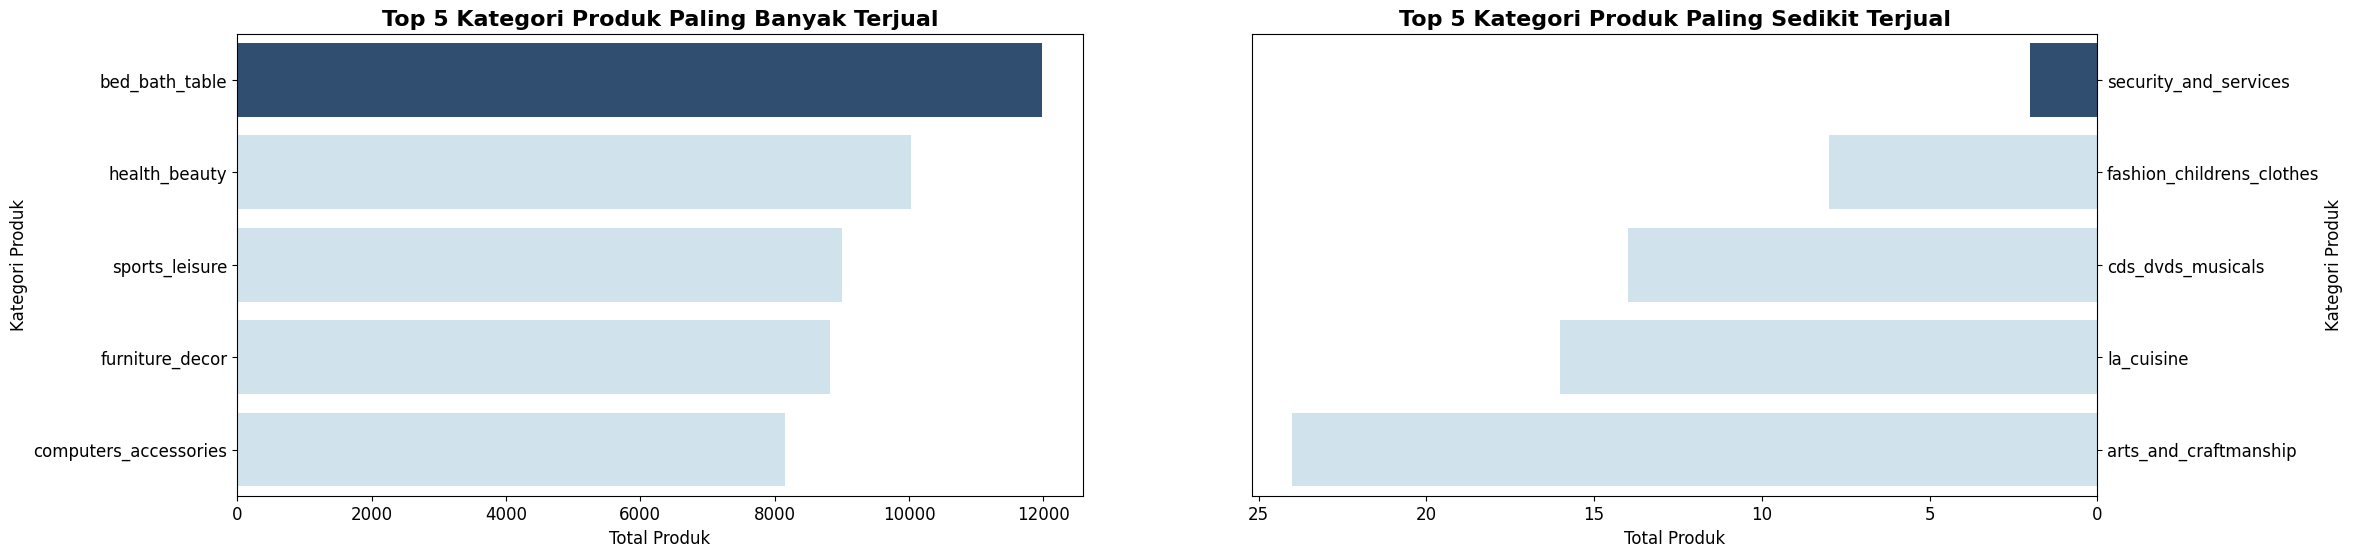

In [160]:
# visualisasi data top 5 kategori produk yang paling banyak terjual dan paling sedikit terjual
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ['#254E7A', '#CBE3EF', '#CBE3EF', '#CBE3EF', '#CBE3EF']

sns.barplot(x='total_product', y='product_category_name_english', data=produk_analisis.head(
    5), hue='product_category_name_english', palette=colors, ax=ax[0])
ax[0].set_title('Top 5 Kategori Produk Paling Banyak Terjual',
                loc='center', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Total Produk', fontsize=12)
ax[0].set_ylabel('Kategori Produk', fontsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=12)

sns.barplot(x='total_product', y='product_category_name_english', data=produk_analisis.sort_values(
    by='total_product', ascending=True).head(5), hue='product_category_name_english', palette=colors, ax=ax[1])
ax[1].set_title('Top 5 Kategori Produk Paling Sedikit Terjual',
                loc='center', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Total Produk', fontsize=12)
ax[1].set_ylabel('Kategori Produk', fontsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)

pada gambar di atas, dapat diketahui bahwa kategori produk yang paling banyak terjual adalah 'bed_bath_table' dengan penjualan sekitar 12000 dan yang paling sedikit terjual adalah 'security_and_services' dengan penjualan sekitar < 5 

### 2. Bagaimana tren penjualan berdasarkan waktu per-bulan?

In [161]:
# membuat kolom baru berupa tahun dan bulan dari order_purchase_timestamp
merge_all['year'] = merge_all['order_purchase_timestamp'].dt.year
merge_all['month'] = merge_all['order_purchase_timestamp'].dt.month

# karena data pada penjualan tahun 2016 sangat sedikit, maka data yang akan dianalisis adalah data pada tahun 2017 dan 2018
filtered_data = merge_all[merge_all['year'].isin([2017, 2018])]

# membuat pivot table yang berisi total order dan total pembayaran pada setiap bulan
monthly_data_analysis = filtered_data.groupby(['year', 'month']).agg({
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()

# mengubah nama kolom order_id menjadi total_orders dan payment_value menjadi total_payment
monthly_data_analysis.rename(columns={
    'order_id': 'total_orders',
    'payment_value': 'total_payment'
}, inplace=True)

# karena data bulan penjualan dalam bentuk angka, maka akan diubah menjadi nama bulan
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
monthly_data_analysis['month'] = monthly_data_analysis['month'].map(
    month_mapping)

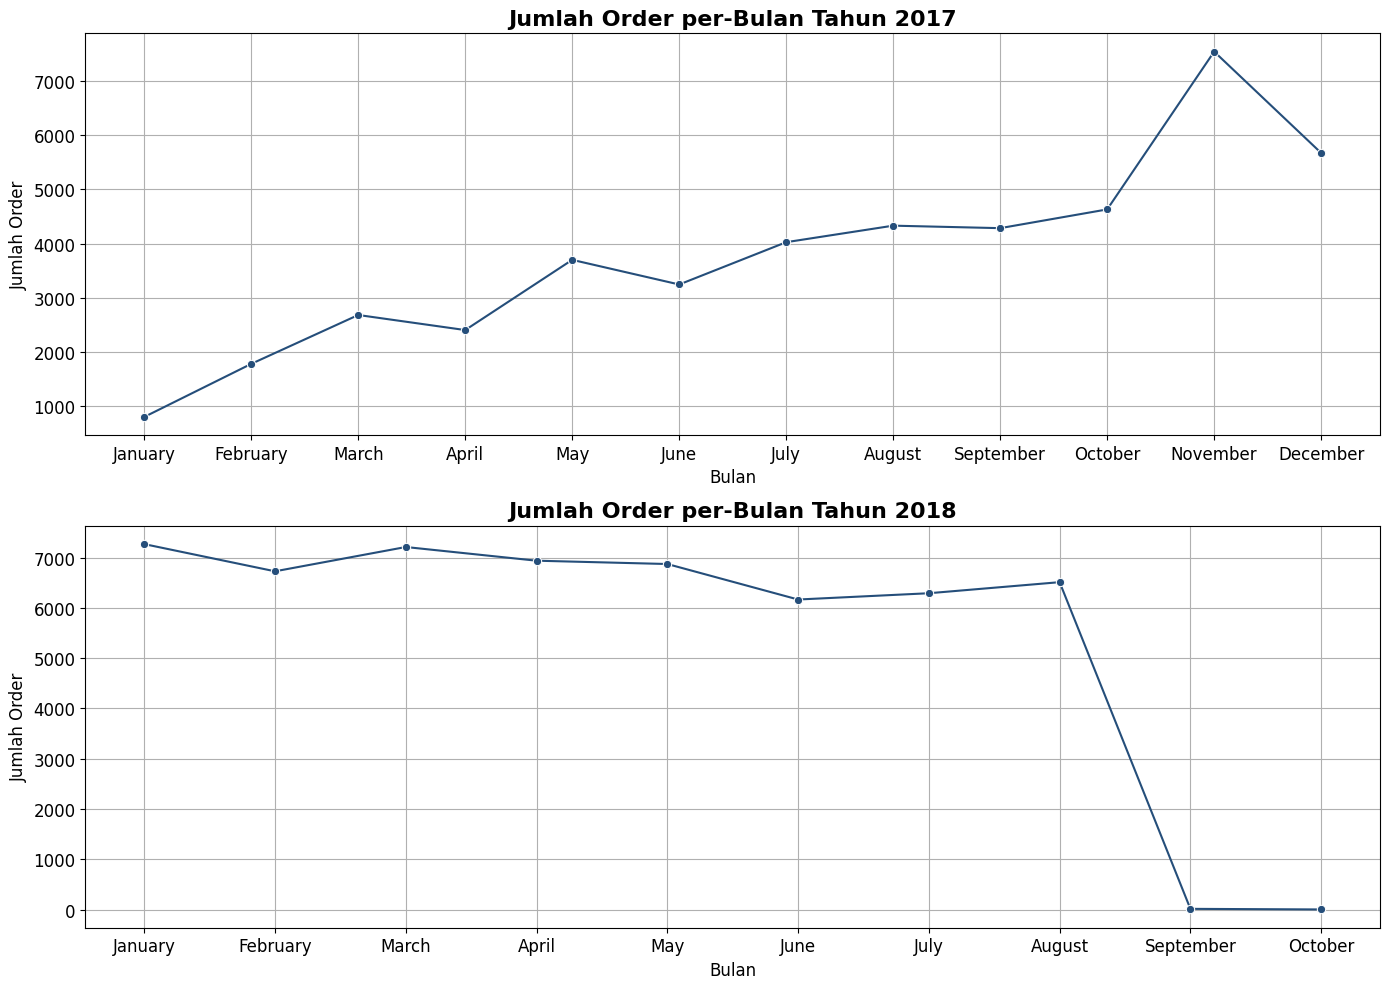

In [162]:
# visualisasi data total order setiap bulan pada tahun 2017 dan 2018
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))
sns.lineplot(data=monthly_data_analysis[monthly_data_analysis['year'] == 2017], x='month', y='total_orders', marker='o', ax=ax[0], color='#254E7A')
ax[0].set_title('Jumlah Order per-Bulan Tahun 2017', loc='center', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Bulan', fontsize=12)
ax[0].set_ylabel('Jumlah Order', fontsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].grid(True)

sns.lineplot(data=monthly_data_analysis[monthly_data_analysis['year'] == 2018], x='month', y='total_orders', marker='o', ax=ax[1], color='#254E7A')
ax[1].set_title('Jumlah Order per-Bulan Tahun 2018', loc='center', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Bulan', fontsize=12)
ax[1].set_ylabel('Jumlah Order', fontsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].grid(True)

plt.tight_layout()
plt.show()

dari data yang telah divisualisasikan, jumlah order pada tahun 2017 meningkat pesat dari Januari 2017 hingga Desember 2017. sayangnya, pada Desember 2017 hingga Oktober 2018, jumlah order terus mengalami penurunan yang signifikan

### 3. Bagaimana skor review dapat mempengaruhi penjualan?

In [163]:
# data dikategorikan berdasarkan review score serta dihitung jumlah order yang memiliki review score tersebut
orders_by_review_score = merge_all.groupby(
    'review_score')['order_id'].nunique().reset_index()

C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_6336\3386168398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orders_by_review_score, x='review_score',


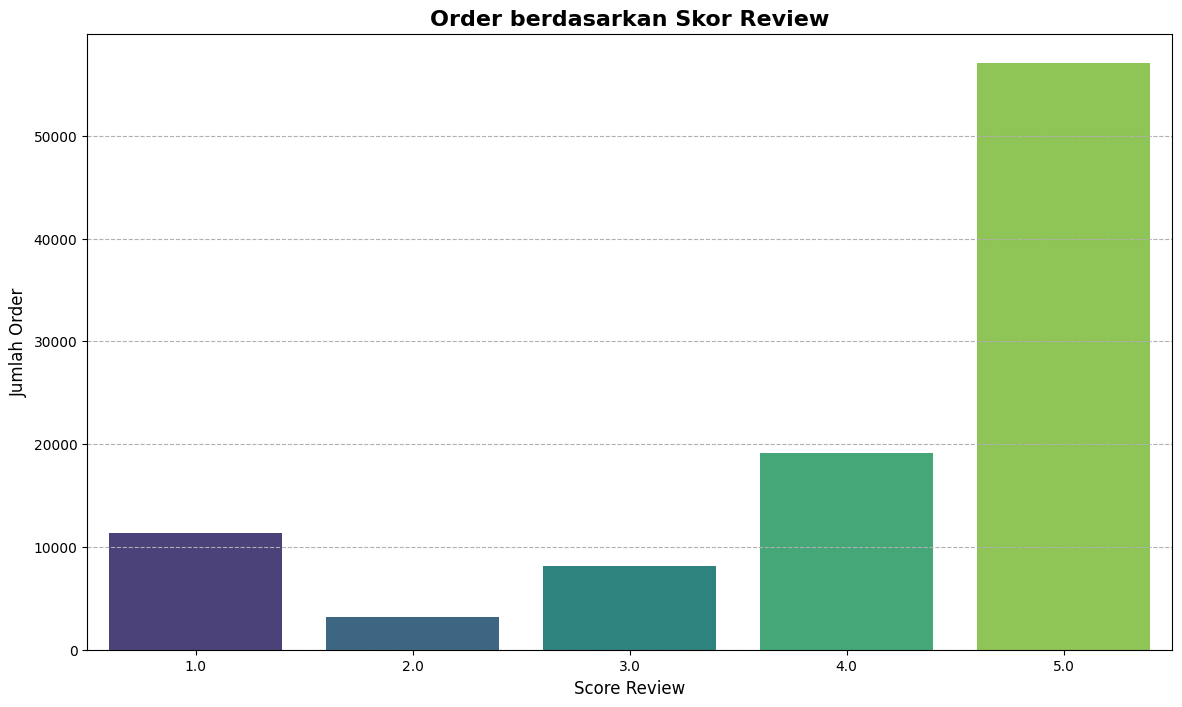

In [164]:
# visualisasi data
plt.figure(figsize=(14, 8))
sns.barplot(data=orders_by_review_score, x='review_score',
            y='order_id', palette='viridis')
plt.title('Order berdasarkan Skor Review', fontsize=16, fontweight='bold')
plt.xlabel('Score Review', fontsize=12)
plt.ylabel('Jumlah Order', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

berdasarkan data yang sudah divisualisasikan, mayoritas order memiliki skor review tinggi, dengan skor 5.0 mendominasi lebih dari 50.000 order, menunjukkan tingkat kepuasan pelanggan yang sangat tinggi.

### 4. Dimanakah lokasi yang memiliki pelanggan terbanyak?

In [165]:
# Mengelompokkan data berdasarkan prefix kode pos dan menghitung jumlah state unik untuk setiap prefix
other_state_geolocation = geolocation_data.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')

other_state_geolocation[other_state_geolocation['count']>= 2].shape

# Mengelompokkan data berdasarkan prefix kode pos dan state, menghitung jumlahnya, dan menghapus duplikasi berdasarkan prefix kode pos
max_state = geolocation_data.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [166]:
# Mengelompokkan data berdasarkan prefix kode pos, kota, dan state untuk menghitung median lat/lng, 
# kemudian menggabungkan hasilnya dengan data state utama menggunakan inner join.
geolocation_silver = geolocation_data.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [167]:
# merge data customer dengan data geolocation
customers_silver = customers_data.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

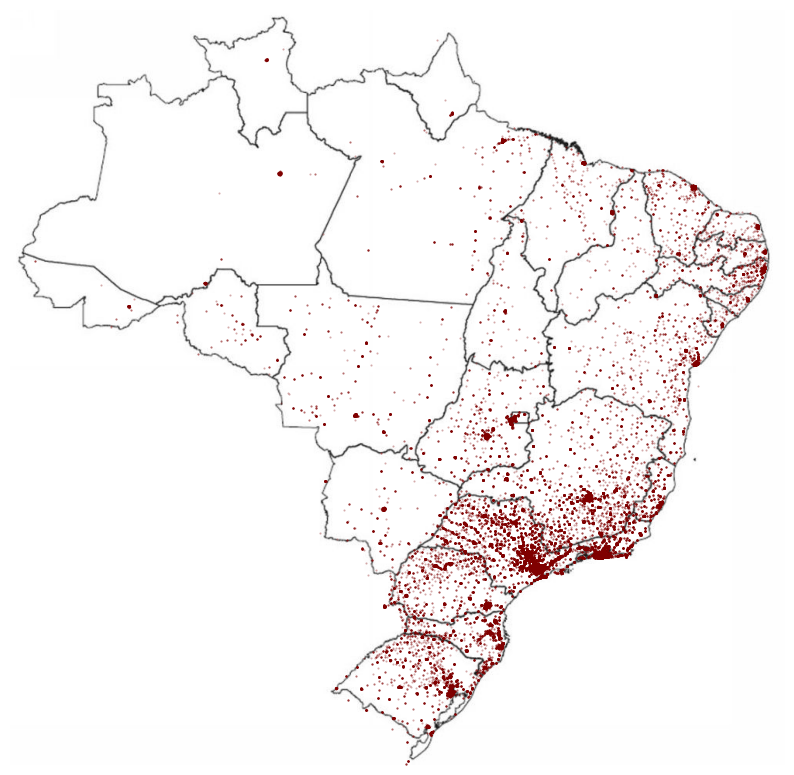

In [168]:
# visualisasi data
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

berdasarkan visualisasi datanya, dapat kita analisis bahwa kepadatan customer hanya di daerah tertentu saja yaitu di wilayah tenggara Brasil

### 5. Apakah pengiriman tepat waktu dapat mempengaruhi review score produk?

In [169]:
# mengelompokkan data berdasarkan status pengiriman dan menghitung rata-rata rating
rating_by_delivery = merge_all.groupby('delivered_on_time')['review_score'].mean().reset_index()

# mengubah nilai delivered_on_time menjadi On Time dan Late
rating_by_delivery['delivered_on_time'] = rating_by_delivery['delivered_on_time'].map({True: 'On Time', False: 'Late'})

C:\Users\Asus-PC\AppData\Local\Temp\ipykernel_6336\1390610999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_by_delivery, x='delivered_on_time', y='review_score', palette='viridis')


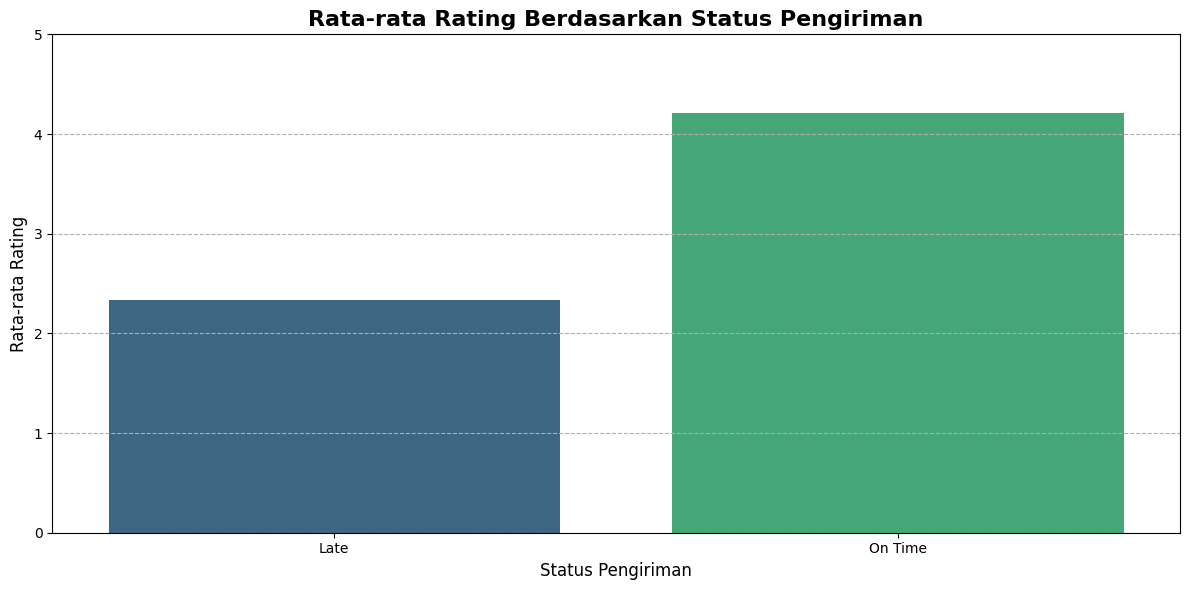

In [170]:
# visualisasi data
plt.figure(figsize=(12, 6))
sns.barplot(data=rating_by_delivery, x='delivered_on_time', y='review_score', palette='viridis')
plt.title('Rata-rata Rating Berdasarkan Status Pengiriman', fontsize=16, fontweight='bold')
plt.xlabel('Status Pengiriman', fontsize=12)
plt.ylabel('Rata-rata Rating', fontsize=12)
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

berdasarkan data yang sudah divisualisasikan, pengiriman tepat waktu memiliki rata-rata rating yang lebih tinggi dibandingkan pengiriman yang terlambat.

## __RFM analysis__

In [171]:
# Mengelompokkan data berdasarkan customer_unique_id dan menghitung nilai recency, frequency, dan monetary untuk setiap pelanggan
rfm_data = merge_all.groupby(by='customer_unique_id', as_index=False).agg({
    'order_purchase_timestamp': 'max',
    'order_id': 'nunique',
    'payment_value': 'sum'
})

# mengubah nama kolom
rfm_data.columns = ['customer_unique_id',
                    'max_order_timestamp', 'frequency', 'monetary']

# menghitung recency
rfm_data['max_order_timestamp'] = rfm_data['max_order_timestamp'].dt.date
recent_date = merge_all['order_purchase_timestamp'].dt.date.max()

def calculate_recency(order_date):
    return (recent_date - order_date).days

rfm_data['recency'] = rfm_data['max_order_timestamp'].apply(calculate_recency)
rfm_data.drop('max_order_timestamp', axis=1, inplace=True)
rfm_data.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,163
2,0000f46a3911fa3c0805444483337064,1,86.22,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,370
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,337


In [172]:
# menghitung recency
recent_date = merge_all['order_purchase_timestamp'].max() + timedelta(days=1)

# mengelompokkan data berdasarkan customer_unique_id dan menghitung nilai recency, frequency, dan monetary untuk setiap pelanggan
rfm_data = merge_all.groupby(by='customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (recent_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()

# mengubah nama kolom
rfm_data.rename(columns={
    'order_purchase_timestamp': 'recency',
    'order_id': 'frequency',
    'payment_value': 'monetary'
}, inplace=True)

In [173]:
# memberikan skor R, F, dan M dari 1 hingga 5 berdasarkan kuantiles
rfm_data['R_Score'] = pd.qcut(rfm_data['recency'], 5, labels=[
                              5, 4, 3, 2, 1]).astype(int)
rfm_data['F_Score'] = pd.qcut(rfm_data['frequency'].rank(
    method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm_data['M_Score'] = pd.qcut(rfm_data['monetary'], 5, labels=[
                              1, 2, 3, 4, 5]).astype(int)

rfm_data['RFM_Score'] = rfm_data['R_Score'].map(
    str) + rfm_data['F_Score'].map(str) + rfm_data['M_Score'].map(str)

In [174]:
# fungsi segmentasi customer berdasarkan RFM Score
def segment(x):
    if x['R_Score'] >= 4 and x['F_Score'] >= 4 and x['M_Score'] >= 4:
        return 'Best Customers'
    elif x['R_Score'] >= 4 and x['F_Score'] <= 2:
        return 'New Customers'
    elif x['R_Score'] >= 3 and x['F_Score'] >= 3 and x['M_Score'] >= 3:
        return 'Loyal Customers'
    else:
        return 'Others'

rfm_data['Segment'] = rfm_data.apply(segment, axis=1)

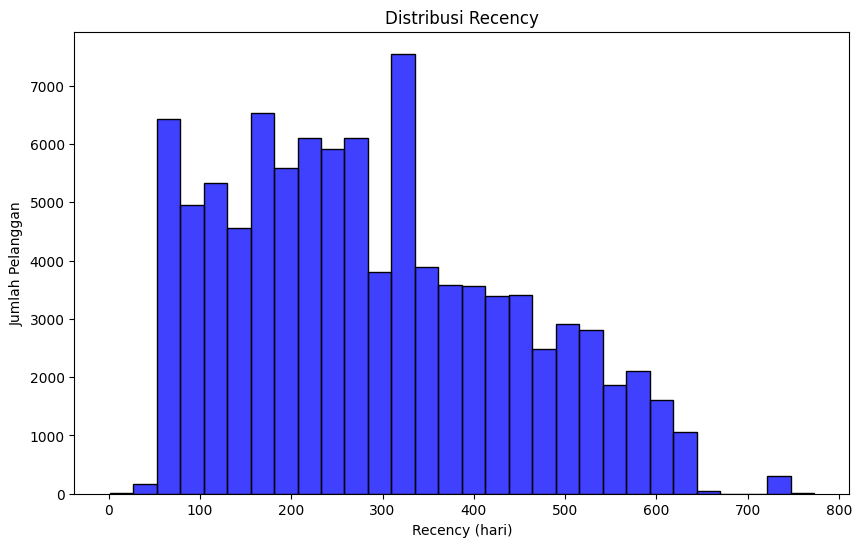

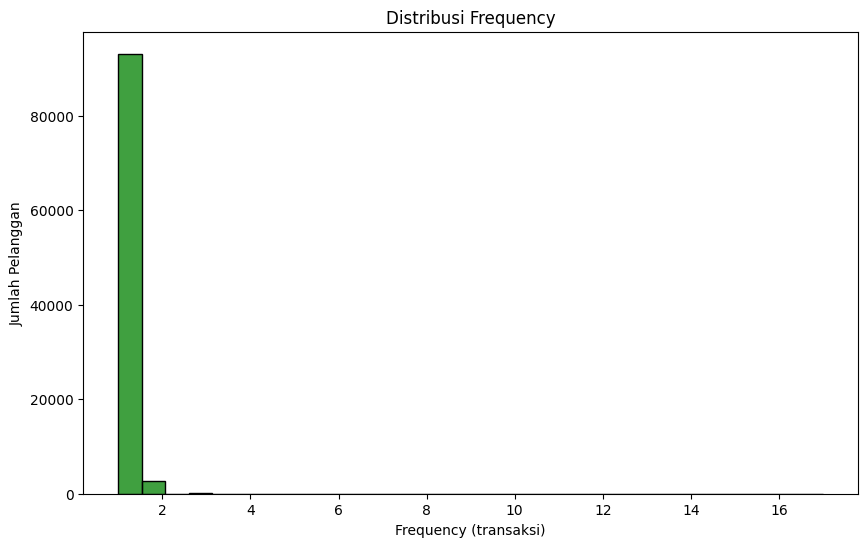

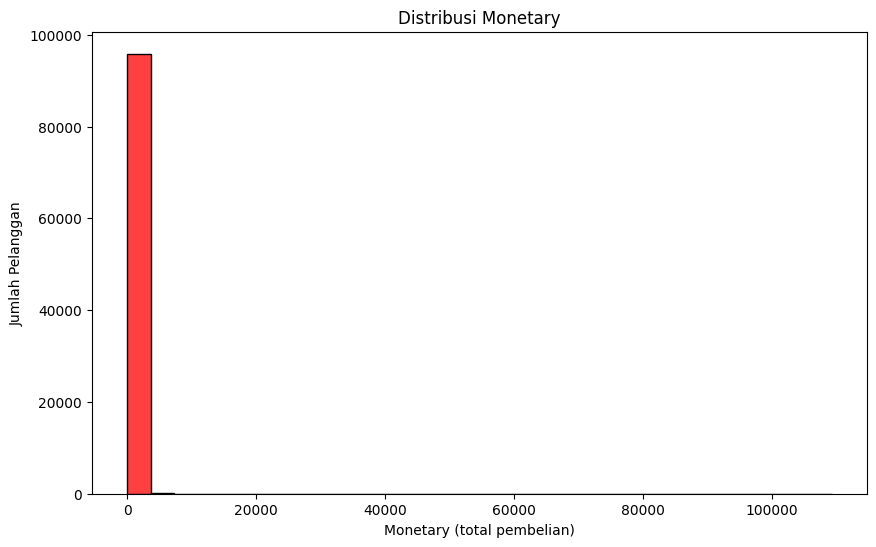

In [175]:
# visualisasi data
plt.figure(figsize=(10, 6))
sns.histplot(rfm_data['recency'], bins=30, kde=False, color='blue')
plt.title('Distribusi Recency')
plt.xlabel('Recency (hari)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(rfm_data['frequency'], bins=30, kde=False, color='green')
plt.title('Distribusi Frequency')
plt.xlabel('Frequency (transaksi)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(rfm_data['monetary'], bins=30, kde=False, color='red')
plt.title('Distribusi Monetary')
plt.xlabel('Monetary (total pembelian)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

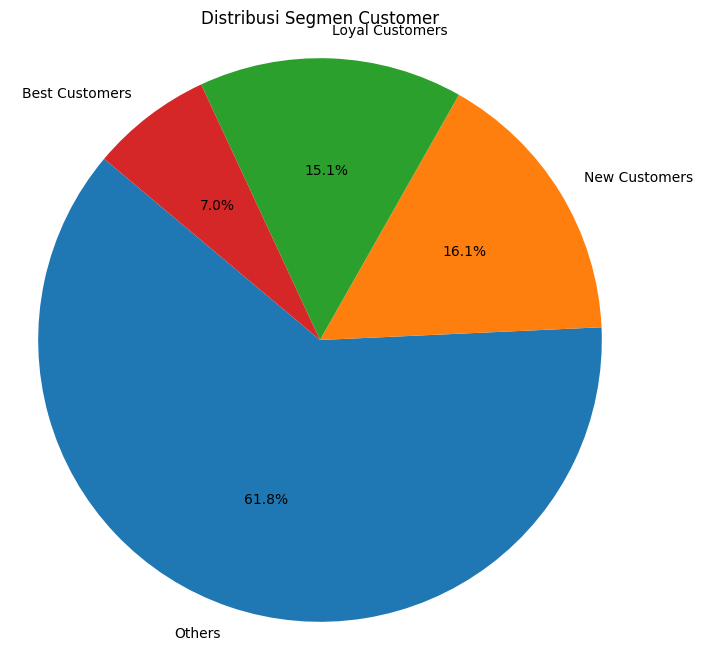

In [176]:
# visualisasi data
segment_counts = rfm_data['Segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(segment_counts.values, labels=segment_counts.index,
        autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Segmen Customer')
plt.axis('equal')
plt.show()

kesimpulan RFM analysis:
- Recency: Mayoritas customer melakukan pembelian terakhir antara 100-400 hari lalu.
- Frequency: Sebagian besar customer hanya melakukan 1-2 transaksi.
- Monetary: Nilai pembelian rata-rata pelanggan cenderung rendah.
- Segmentasi Customer:
  - Best Customer: Customer yang perlu dipertahankan.
  - New Customer: Customer baru dengan recency tinggi tetapi frekuensi rendah.
  - Loyal Customer: Customer yang sering bertransaksi.
  - Others: Customer dengan skor RFM rendah.